In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def solve_second_derivatives(x_vec, y_vec, n, alpha, beta):
    h_vec = np.diff(x_vec)
    d = np.zeros(n)
    m = np.zeros(n)

    # Calculate d vector
    for i in range(1, n-1):
        d[i] = (6/(h_vec[i-1] + h_vec[i])) * (A_i(i+1, y_vec, h_vec) - A_i(i, y_vec, h_vec))

    # Apply boundary conditions
    d[0] = alpha
    d[n-1] = beta

    # Forward elimination
    for i in range(1, n-1):
        lambda_i = h_vec[i] / (h_vec[i-1] + h_vec[i])
        mu_i = 1 - lambda_i
        d[i] = d[i] - mu_i * d[i-1] / (lambda_i * m[i-1])

    # Back substitution
    m[n-2] = d[n-2] / (1 - (h_vec[n-2] / (h_vec[n-2-1] + h_vec[n-2])) * m[n-3])
    for i in range(n-3, -1, -1):
        m[i] = (d[i] - m[i+1] * h_vec[i]) / (h_vec[i-1] + h_vec[i])

    return m

In [26]:
def interpolate(x, x_vec, y_vec, m):
    n = len(x_vec)
    for i in range(1, n):
        if x >= x_vec[i-1] and x <= x_vec[i]:
            h = x_vec[i] - x_vec[i-1]
            s_m1 = m[i-1] * np.power(x_vec[i] - x, 3) / (6*h) + m[i] * np.power(x - x_vec[i-1], 3) / (6*h) + (y_vec[i-1] - m[i] * h * h / 6) * (x_vec[i] - x) / h + (y_vec[i] - m[i-1] * h * h / 6) * (x - x_vec[i-1]) / h
            return s_m1

def A_i(i, y_vec, h_vec):
    if i == 0:
        return (y_vec[1] - y_vec[0]) / h_vec[0]
    elif i == len(y_vec) - 1:
        return (y_vec[-1] - y_vec[-2]) / h_vec[-1]
    else:
        return (y_vec[i+1] - y_vec[i]) / h_vec[i] - (y_vec[i] - y_vec[i-1]) / h_vec[i-1]

def finite_difference_second_derivative(f, x, dx=0.01):
    return (f(x+dx) + f(x-dx) - 2*f(x)) / (dx*dx)

# Example functions to interpolate
def f1(x):
    return 1 / (1 + x**2)

def f2(x):
    return np.cos(2*x)


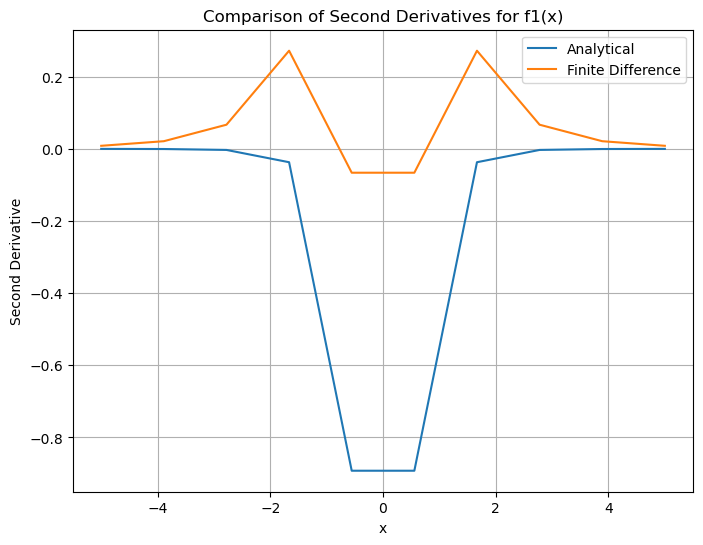

In [28]:
# Task 4: Compare second derivatives
x_values = np.linspace(-5, 5, 10)
dx = 0.01
second_derivatives_analytical_f1 = [-2*f1(x) / (1 + x**2)**2 for x in x_values]
second_derivatives_finite_difference_f1 = [finite_difference_second_derivative(f1, x, dx) for x in x_values]

# Plot comparison of second derivatives
plt.figure(figsize=(8, 6))
plt.plot(x_values, second_derivatives_analytical_f1, label='Analytical')
plt.plot(x_values, second_derivatives_finite_difference_f1, label='Finite Difference')
plt.title('Comparison of Second Derivatives for f1(x)')
plt.xlabel('x')
plt.ylabel('Second Derivative')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_4606/3046382935.py:18: RuntimeWarning: invalid value encountered in scalar divide
  d[i] = d[i] - mu_i * d[i-1] / (lambda_i * m[i-1])


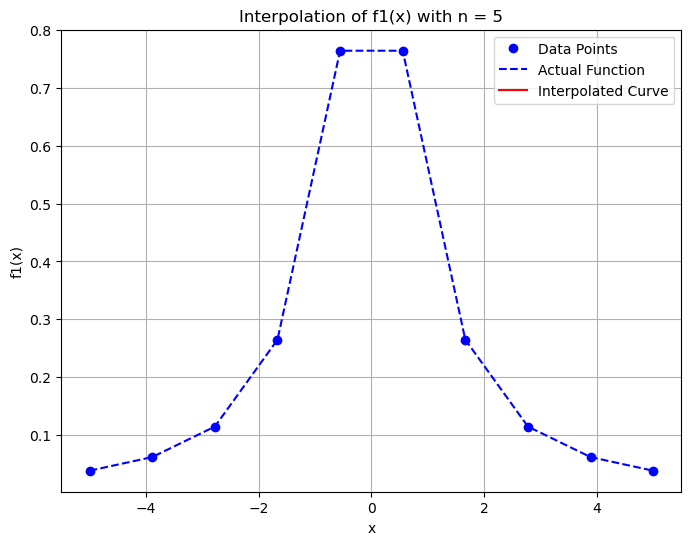

In [31]:
# Task 5: Interpolation

# Interpolation for n = 5
n = 5
x_range_interpolation = np.linspace(-5, 5, n+2)[1:-1]
y_range_interpolation_f1 = f1(x_range_interpolation)
m_f1 = solve_second_derivatives(x_range_interpolation, y_range_interpolation_f1, n, 0, 0)
interpolated_values_f1 = [interpolate(x, x_range_interpolation, y_range_interpolation_f1, m_f1) for x in x_values]

# Plot interpolated values for n = 5
plt.figure(figsize=(8, 6))
plt.plot(x_values, f1(x_values), 'bo', label='Data Points')
plt.plot(x_values, f1(x_values), 'b--', label='Actual Function')
plt.plot(x_values, interpolated_values_f1, 'r-', label='Interpolated Curve')
plt.title('Interpolation of f1(x) with n = 5')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_4606/3046382935.py:18: RuntimeWarning: invalid value encountered in scalar divide
  d[i] = d[i] - mu_i * d[i-1] / (lambda_i * m[i-1])


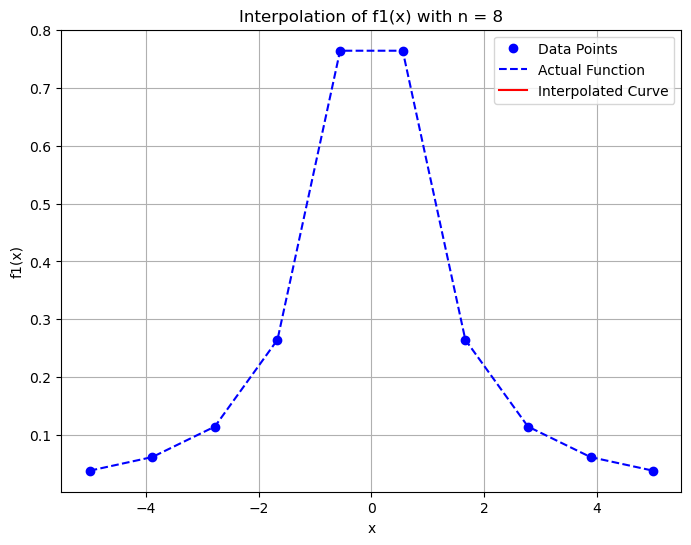

In [32]:
# Interpolation for n = 8
n = 8
x_range_interpolation = np.linspace(-5, 5, n+2)[1:-1]
y_range_interpolation_f1 = f1(x_range_interpolation)
m_f1 = solve_second_derivatives(x_range_interpolation, y_range_interpolation_f1, n, 0, 0)
interpolated_values_f1 = [interpolate(x, x_range_interpolation, y_range_interpolation_f1, m_f1) for x in x_values]

# Plot interpolated values for n = 8
plt.figure(figsize=(8, 6))
plt.plot(x_values, f1(x_values), 'bo', label='Data Points')
plt.plot(x_values, f1(x_values), 'b--', label='Actual Function')
plt.plot(x_values, interpolated_values_f1, 'r-', label='Interpolated Curve')
plt.title('Interpolation of f1(x) with n = 8')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

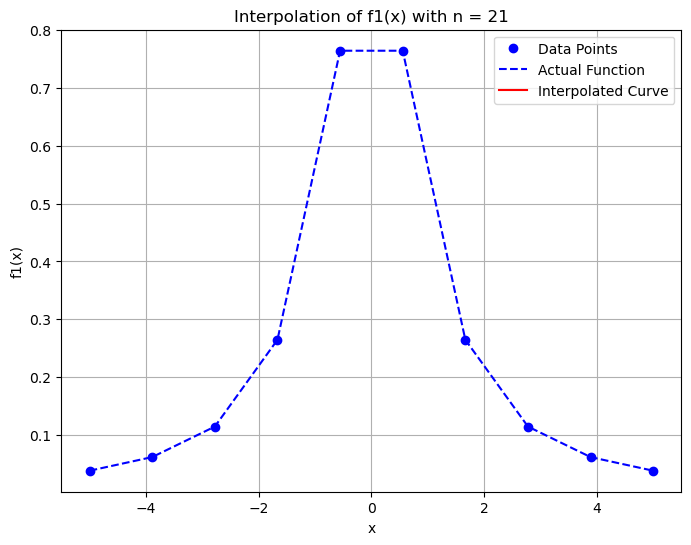

In [33]:
# Plot interpolated values for n = 21
plt.figure(figsize=(8, 6))
plt.plot(x_values, f1(x_values), 'bo', label='Data Points')
plt.plot(x_values, f1(x_values), 'b--', label='Actual Function')
plt.plot(x_values, interpolated_values_f1, 'r-', label='Interpolated Curve')
plt.title('Interpolation of f1(x) with n = 21')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()